In [1]:
require(dplyr)
require(reshape2)
require(ggplot2)

Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: reshape2
Loading required package: ggplot2


In [10]:
texas.rw <- data.frame(graph='texas', method='rw', 
                       read.csv('sampled/roads_texas_rw.csv', header = T))
texas.ff <- data.frame(graph='texas', method='ff', 
                       read.csv('sampled/roads_texas_ff.csv', header = T))
facebook.rw <- data.frame(graph='facebook', method='rw', 
                          read.csv('sampled/facebook_rw.csv', header = T))
facebook.ff <- data.frame(graph='facebook', method='ff', 
                          read.csv('sampled/facebook_ff.csv', header = T))

In [29]:
data <- rbind(texas.rw, texas.ff, facebook.rw, facebook.ff)
str(data)

'data.frame':	400 obs. of  10 variables:
 $ graph                        : Factor w/ 2 levels "texas","facebook": 1 1 1 1 1 1 1 1 1 1 ...
 $ method                       : Factor w/ 2 levels "rw","ff": 1 1 1 1 1 1 1 1 1 1 ...
 $ edges                        : int  1202 1250 1176 1238 1259 1240 1195 1292 1217 1196 ...
 $ triangles                    : int  51 54 41 42 50 54 44 41 43 38 ...
 $ mean_triangles               : num  0.153 0.162 0.123 0.126 0.15 0.162 0.132 0.123 0.129 0.114 ...
 $ density                      : num  0.00241 0.0025 0.00235 0.00248 0.00252 ...
 $ mean_degree                  : num  2.4 2.5 2.35 2.48 2.52 ...
 $ components                   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ mean_component_size          : num  1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 ...
 $ global_clustering_coefficient: num  0.0709 0.07 0.0601 0.0554 0.063 ...


In [35]:
analyzed.data <- data %>% 
    select(-edges, -triangles, -mean_component_size) %>%
    melt(id.vars=c('graph', 'method'))

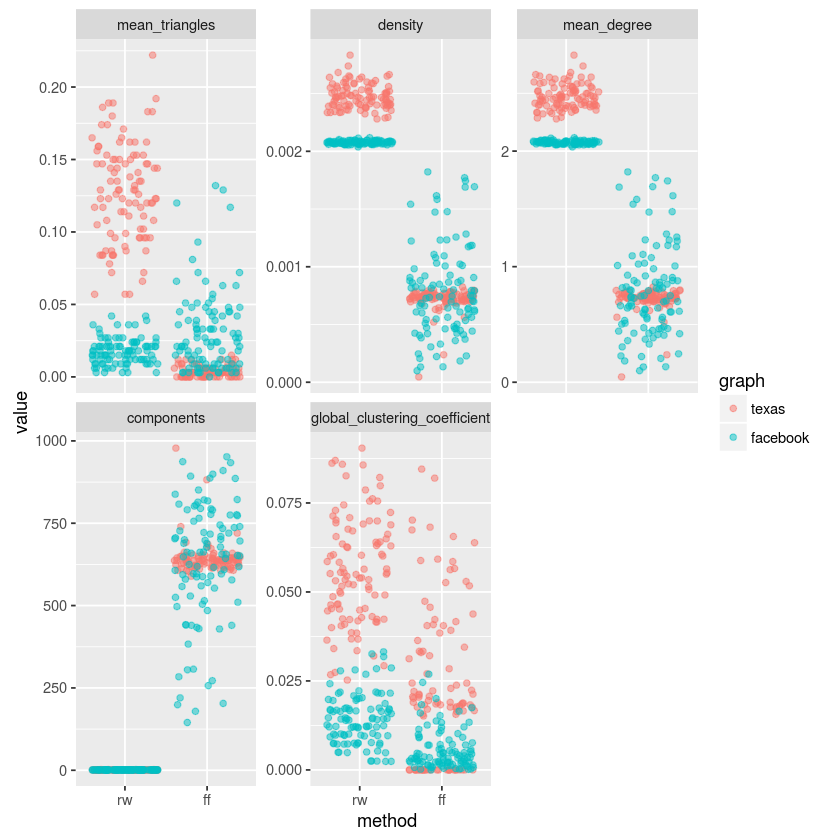

In [43]:
ggplot(analyzed.data, aes(x=method, y=value)) + 
    facet_wrap(~variable, scales='free_y') + 
    geom_jitter(aes(color = graph), alpha=0.5)